In [1]:
# Python version
import sys
print(sys.version)

3.5.3 | packaged by conda-forge | (default, May 12 2017, 16:16:49) [MSC v.1900 64 bit (AMD64)]


In [2]:
import os
import math
import locale
import itertools

from scipy import special
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

In [3]:
# matplotlib.style.use('ggplot')
%matplotlib inline 

In [4]:
locale.setlocale(locale.LC_ALL, '')
# locale.setlocale(locale.LC_ALL, 'no')

'English_United States.1252'

In [5]:
def nCr(N, k):
    return special.comb(N, k, exact=True)

In [6]:
def chance_of_not_among(N, k, total):
    """Chance of k draws from total is not among N items"""
    if N >= total - k + 1:
        return 0
    return np.product([1 - N/remaining for remaining in range(total-k+1, total+1)])

In [7]:
def chance_of_all_among(N, k):
    """Chance of getting k successes from N"""
    return 1/nCr(N, k)

In [8]:
def get_probabilities_for(N):
    """Retrieve chance of all N excluded, and chance of winning then."""
    p_a = chance_of_not_among(N, 7, 34)
    p_b = chance_of_all_among(34-N, 7)
    return p_a, p_b

In [9]:
def test():
    N = 27
    k = 7
    t = total = 34
    p1 = chance_of_not_among(N,k,total)
    
    # Use to verify chance_of_not_among
    alpha = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'
    abc = list(itertools.combinations(alpha[:total],k))
    excluded = alpha[:N]
    p2 = sum(1 if not any(c in excluded for c in combo) else 0 for combo in abc)/len(abc)
    
    p3 = chance_of_all_among(34, 7)
    print(p1, p2, p3)

In [10]:
if True:
    test()

1.8588687371e-07 1.858868737099451e-07 1.858868737099451e-07


In [11]:
n_combinations = nCr(34, 7)
odds = 1/n_combinations

print('Number of combinations: {:>20n}'.format(n_combinations))
print('Probability of success: {:>20.16f}'.format(odds))

Number of combinations:            5,379,616
Probability of success:   0.0000001858868737


In [12]:
df = pd.DataFrame((get_probabilities_for(N) for N in range(28)), columns=['p_a', 'p_b'])
df.index.name = 'N'

In [13]:
df['p_ab'] = df.p_a * df.p_b
df

,p_a,p_b,p_ab
N,,,
0,1.000000e+00,1.858869e-07,1.858869e-07
1,7.941176e-01,2.340798e-07,1.858869e-07
2,6.256684e-01,2.971012e-07,1.858869e-07
3,4.888035e-01,3.802896e-07,1.858869e-07
4,3.784285e-01,4.912074e-07,1.858869e-07
5,2.901285e-01,6.407053e-07,1.858869e-07
6,2.200975e-01,8.445661e-07,1.858869e-07
7,1.650731e-01,1.126088e-06,1.858869e-07
8,1.222764e-01,1.520219e-06,1.858869e-07


In [14]:
def resize_text(ax, labelsize, titlesize, ticksize=None):
    ticksize = ticksize or labelsize
    for ticklabel in (ax.get_xticklabels()):
        ticklabel.set_fontsize(ticksize)
    for ticklabel in (ax.get_yticklabels()):
        ticklabel.set_fontsize(ticksize)
    ax.xaxis.get_label().set_fontsize(labelsize)
    ax.yaxis.get_label().set_fontsize(labelsize)
    ax.title.set_fontsize(titlesize)    

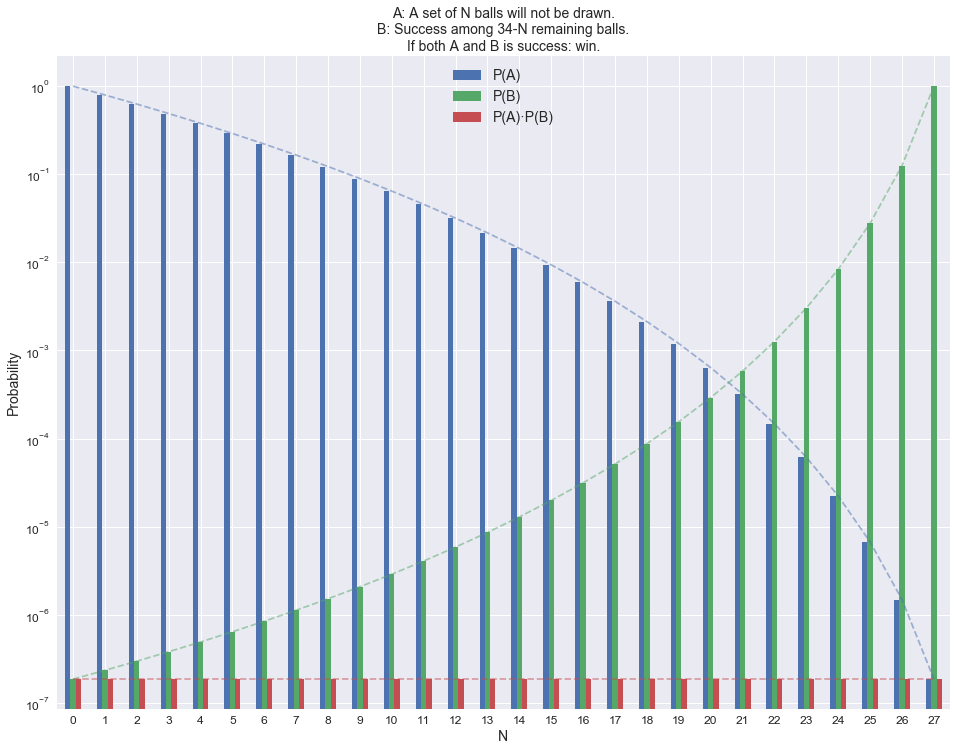

In [16]:
title = 'A: A set of N balls will not be drawn.\n' \
        'B: Success among 34-N remaining balls.\n' \
        'If both A and B is success: win.'
ax = df.plot(logy=True, figsize=(16,12), kind='bar', title=title, rot=0)
ax.set_ylabel('Probability')
resize_text(ax, 14, 14, 12)

ax.legend(['P(A)', 'P(B)', 'P(A)·P(B)'], fontsize=14)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
# plt.xticks(rotation=0)

indicator_args = dict(linestyle='--', alpha=0.5)
ax.plot(df.p_a, **indicator_args)
ax.plot(df.p_b, **indicator_args)
ax.plot(df.p_ab, **indicator_args)

fig = plt.gcf()

fig.savefig(os.path.join('img', 'lotto N.png'), facecolor='white', edgecolor='none')